In [3]:
%matplotlib inline
import pykat
import pykat.optics.ABCD as abcd
import pylab as pl
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

                                              ..-
    PyKat 1.0.17          _                  '(
                          \`.|\.__...-""""-_." )
       ..+-----.._        /  ' `            .-'
   . '            `:      7/* _/._\    \   (
  (        '::;;+;;:      `-"' =" /,`"" `) /
  L.        \`:::a:f            c_/     n_'
  ..`--...___`.  .    ,  
   `^-....____:   +.      www.gwoptics.org/pykat



In [27]:
kat_code = """
laser l1 1 0 n1 % laser with P=30W at the default frequency
space s1 1 1 n1 n2 % space of 1m length

% first trace: symmetric BS
bs b1 0.5 0.5 0 0 n2 nN1 nE1 nS1 % 50:50 beam splitter

% second trace:
%bs b1 0.4 0.6 0 0 n2 nN1 nE1 nS1 % 40:60 beam splitter

% third trace:
%bs b1 0.45 0.45 0 0 n2 nN1 nE1 nS1 % 45:45 beamsplitter

s LN 4000 nN1 nN2 % north arm
s LE 4000 nE1 nE2 % east arm

m2 mN 1 0 0 nN2 dump % north end mirror, lossless
m2 mE 1 0 0 nE2 dump % east end mirror, lossless

s s2 1 1 nS1 nout

pd1 South $fs nout % photo detector in South port
"""


vary_end = """
xaxis mE phi lin 0 360 100 % changing the microscopic position of mN
"""

darm_commands = """
attr mN mass 40 zmech sus
attr mE mass 40 zmech sus

tf sus 1 0 p $mech_fres $mech_Q
const mech_fres 1  # Approx. resonance frequency
const mech_Q    1 # Guess for suspension Q factor

fsig darm  LN 1 0 1
fsig darm2 LE 1 180 1

qnoisedS NSR_with_RP 1 $fs nout

xaxis darm f log 5 10k 100
yaxis lin re:im
retrace off
"""

In [28]:
basekat = pykat.finesse.kat() 
basekat.parseCommands(kat_code)
basekat.parseCommands(vary_end)
basekat.undumpNodes() #undump the vacuum nodes to get the right quantum noise
kat=basekat.deepcopy() #copy kat code
kat.verbose = False

out = kat.run()

Parsing `laser l1 1 0 n1` into pykat object not implemented yet, added as extra line.
Parsing `space s1 1 1 n1 n2` into pykat object not implemented yet, added as extra line.


In [29]:
### QM-limited Sensitvity
basekat1 = pykat.finesse.kat() 
basekat1.parseCommands(kat_code)
basekat1.parseCommands(darm_commands)
basekat1.undumpNodes() #undump the vacuum nodes to get the right quantum noise
kat1=basekat1.deepcopy() #copy kat code
kat1.verbose = False

out1 = kat1.run()

Parsing `laser l1 1 0 n1` into pykat object not implemented yet, added as extra line.
Parsing `space s1 1 1 n1 n2` into pykat object not implemented yet, added as extra line.


/home/thomasvo/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


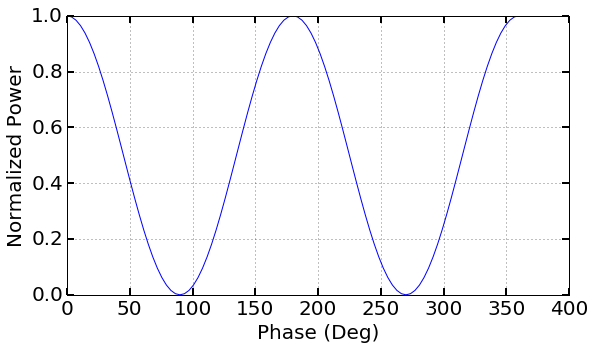

In [33]:
pl.figure(figsize=(9, 5), dpi=80)


pl.subplot(111)

pl.plot(out.x,out['South'])

pl.legend(fontsize=15)

pl.xlabel("Phase (Deg)",fontsize=20)
pl.ylabel("Normalized Power",fontsize=20)

###Main plot formatting
pl.tick_params(labelsize=20)
pl.tick_params(which='both', width=2)
pl.tick_params(which='major', length=7)
pl.tick_params(which='minor', length=4)
pl.grid(True, zorder=-1)

pl.show()

/home/thomasvo/anaconda3/lib/python3.5/site-packages/numpy/core/numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/thomasvo/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


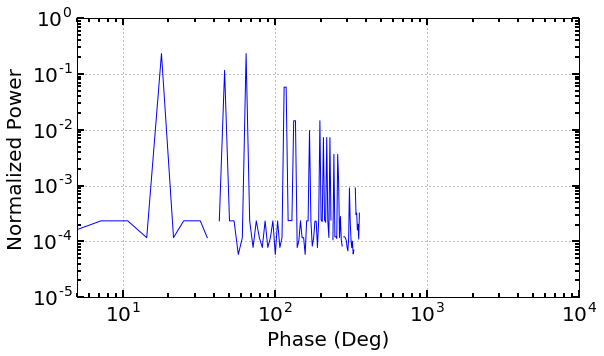

In [31]:
pl.figure(figsize=(9, 5), dpi=80)

pl.subplot(111)

pl.loglog(out.x,out1['NSR_with_RP'])

pl.legend(fontsize=15)

pl.xlim(out1.x.min(),out1.x.max())
pl.xlabel("Phase (Deg)",fontsize=20)
pl.ylabel("Normalized Power",fontsize=20)

###Main plot formatting
pl.tick_params(labelsize=20)
pl.tick_params(which='both', width=2)
pl.tick_params(which='major', length=7)
pl.tick_params(which='minor', length=4)
pl.grid(True, zorder=-1)

pl.show()